### <u>Table of Contents</u>

[I. Import Libraries and set required parameters](#library)

![](http://)[II. Data Sourcing](#sourcing)

[III. Data Cleaning and Manipulation](#cleaning)

[IV. Derived Metrics](#derived)

[V. Univariate Analysis](#univariate)

[VI. Bivariate/Multivariate Analysis](#bivariate)

[VII. Bivariate/Multivariate Analysis with Probability of Charged off](#bivariate_prob)

[VIII. Conclusion](#Conclusion)

<a id='prerequisite'></a>

<a id='library'></a>

## II. Import Libraries and set required parameters

In [1]:
import numpy as np
print('numpy version\t:',np.__version__)
import pandas as pd
print('pandas version\t:',pd.__version__)
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

# Regular expressions
import re

# seaborn : advanced visualization
import seaborn as sns
print('seaborn version\t:',sns.__version__)

pd.options.mode.chained_assignment = None #set it to None to remove SettingWithCopyWarning
pd.options.display.float_format = '{:.4f}'.format #set it to convert scientific noations such as 4.225108e+11 to 422510842796.00
pd.set_option('display.max_columns', 100) # to display all the columns

np.set_printoptions(suppress=True,formatter={'float_kind':'{:f}'.format})

import os

import warnings
warnings.filterwarnings('ignore') # if there are any warning due to version mismatch, it will be ignored

numpy version	: 1.16.4
pandas version	: 0.24.2
seaborn version	: 0.9.0


<a id='sourcing'></a>

## III. Data Sourcing

In [2]:
loan_bkp = pd.read_csv('C:/Users/Puran Prakash Sinha/Desktop/Data Science/Python/EDA/loan.csv')

In [3]:
loan=loan_bkp

#### Get some insights

In [4]:
loan.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,...,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0000,36 months,10.65%,162.8700,B,B2,NaN,10+ years,RENT,24000.0000,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.6500,0,Jan-85,1,nan,nan,3,0,13648,83.70%,9,f,0.0000,0.0000,5863.1552,5833.8400,5000.0000,863.1600,0.0000,0.0000,0.0000,Jan-15,171.6200,NaN,May-16,0.0000,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0000,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0000,0.0000,nan,nan,nan,nan
1,1077430,1314167,2500,2500,2500.0000,60 months,15.27%,59.8300,C,C4,Ryder,< 1 year,RENT,30000.0000,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.0000,0,Apr-99,5,nan,nan,3,0,1687,9.40%,4,f,0.0000,0.0000,1008.7100,1008.7100,456.4600,435.1700,0.0000,117.0800,1.1100,Apr-13,119.6600,NaN,Sep-13,0.0000,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0000,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0000,0.0000,nan,nan,nan,nan


In [4]:
NA_col = loan.isnull().sum()
NA_col[NA_col.values >(0.2*len(loan))]

desc                              12940
mths_since_last_delinq            25682
mths_since_last_record            36931
next_pymnt_d                      38577
mths_since_last_major_derog       39717
annual_inc_joint                  39717
dti_joint                         39717
verification_status_joint         39717
tot_coll_amt                      39717
tot_cur_bal                       39717
open_acc_6m                       39717
open_il_6m                        39717
open_il_12m                       39717
open_il_24m                       39717
mths_since_rcnt_il                39717
total_bal_il                      39717
il_util                           39717
open_rv_12m                       39717
open_rv_24m                       39717
max_bal_bc                        39717
all_util                          39717
total_rev_hi_lim                  39717
inq_fi                            39717
total_cu_tl                       39717
inq_last_12m                      39717


__List of Columns & NA counts where NA values are more than 30%__

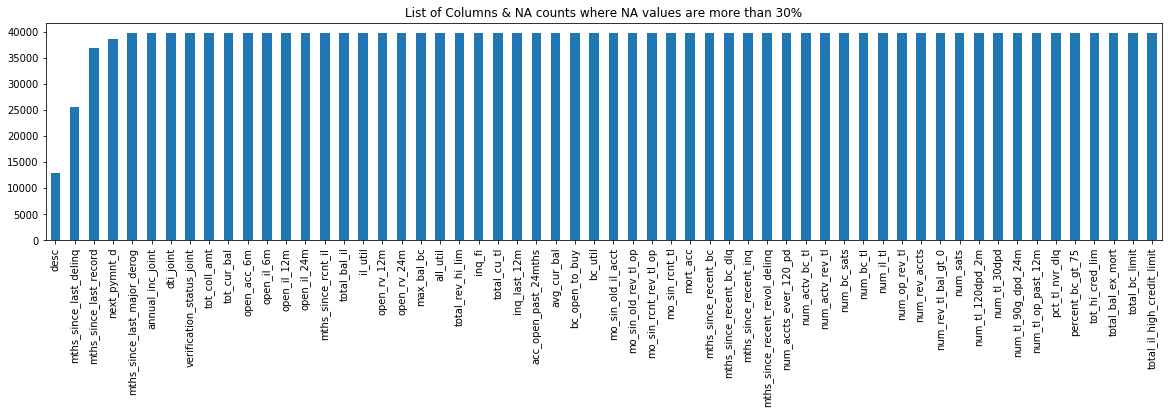

In [5]:
NA_col = loan.isnull().sum()
NA_col = NA_col[NA_col.values >(0.3*len(loan))]
plt.figure(figsize=(20,4))
NA_col.plot(kind='bar')
plt.title('List of Columns & NA counts where NA values are more than 30%')
plt.show()

<font color='blue'><b>Insights</b>: So we can see from the above plot that there are 20+ columns in the dataset where all the values are NA.</font> 

As we can see there are <b>887379</b> rows & <b>74</b> columns in the dataset, it will be very difficult to look at each column one by one & find the NA or missing values.
So let's find out all columns where missing values are more than certain percentage, let's say <b>30%</b>. We will remove those columns as it is not feasable to impute missing values for those columns.

We will create a UDF for this.

<a id='cleaning'></a>

## IV. Data Cleaning and Manipulation

###### removeNulls function for handling nulls 

In [6]:
def removeNulls(dataframe, axis =1, percent=0.3):
    '''
    * removeNull function will remove the rows and columns based on parameters provided.
    * dataframe : Name of the dataframe  
    * axis      : axis = 0 defines drop rows, axis =1(default) defines drop columns    
    * percent   : percent of data where column/rows values are null,default is 0.3(30%)
              
    '''
    df = dataframe.copy()
    ishape = df.shape
    if axis == 0:
        rownames = df.transpose().isnull().sum()
        rownames = list(rownames[rownames.values > percent*len(df)].index)
        df.drop(df.index[rownames],inplace=True) 
        print("\nNumber of Rows dropped\t: ",len(rownames))
    else:
        colnames = (df.isnull().sum()/len(df))
        colnames = list(colnames[colnames.values>=percent].index)
        df.drop(labels = colnames,axis =1,inplace=True)        
        print("Number of Columns dropped\t: ",len(colnames))
        
    print("\nOld dataset rows,columns",ishape,"\nNew dataset rows,columns",df.shape)

    return df

#### 1. Remove columns where NA values are more than or equal to 30%

In [7]:
loan = removeNulls(loan, axis =1,percent = 0.3)

Number of Columns dropped	:  58

Old dataset rows,columns (39717, 111) 
New dataset rows,columns (39717, 53)


#### 2. Remove rows where NA values are more than or equal to 30%
(Note: NA columns has already been removed in step 1, so we may not find any <b>rows</b> where 30% values are NA)

In [8]:
loan = removeNulls(loan, axis =0,percent = 0.3)


Number of Rows dropped	:  0

Old dataset rows,columns (39717, 53) 
New dataset rows,columns (39717, 53)


There are no rows where NA values are more than or equal to 30%

#### 3. Remove columns where number of unique value is only 1.

Let's look at no of unique values for each column.We will remove all columns where number of unique value is only 1 because that will not make any sense in the analysis

In [9]:
unique = loan.nunique()
unique = unique[unique.values == 1]

In [17]:
list(unique.index)

['pymnt_plan',
 'initial_list_status',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens']

In [10]:
loan.drop(labels = list(unique.index), axis =1, inplace=True)
print("So now we are left with",loan.shape ,"rows & columns.")

So now we are left with (39717, 44) rows & columns.


In [12]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 0 to 39716
Data columns (total 44 columns):
id                         39717 non-null int64
member_id                  39717 non-null int64
loan_amnt                  39717 non-null int64
funded_amnt                39717 non-null int64
funded_amnt_inv            39717 non-null float64
term                       39717 non-null object
int_rate                   39717 non-null object
installment                39717 non-null float64
grade                      39717 non-null object
sub_grade                  39717 non-null object
emp_title                  37258 non-null object
emp_length                 38642 non-null object
home_ownership             39717 non-null object
annual_inc                 39717 non-null float64
verification_status        39717 non-null object
issue_d                    39717 non-null object
loan_status                39717 non-null object
url                        39717 non-null object
purpose   

#### 4. Employment Term : Remove 'n/a' value with 'self-employed'.

There are some values in emp_term which are <b>'n/a'</b>, we assume that are <b>'self-employed'</b>. Because for 'self-employed' applicants, emp-lenth is 'Not Applicable'

In [13]:
print(loan.emp_length.unique())
loan.emp_length.fillna('0',inplace=True)
loan.emp_length.replace(['n/a'],'Self-Employed',inplace=True)
print(loan.emp_length.unique())

['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]
['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' '0']


In [14]:
print(loan.emp_length.unique())

['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' '0']


#### 5. Remove irrelevant columns.

Till now we have removed the columns based on the count & statistics.
    Now let's look at each column from business perspective if that is required or not for our analysis such as Unique ID's, URL.
As last 2 digits of zip code is masked 'xx', we can remove that as well.

In [26]:
not_required_columns = ["id","member_id","url", "emp_title"]
loan.drop(labels = not_required_columns, axis =1, inplace=True)
print("So now we are left with",loan.shape ,"rows & columns.")

KeyError: "['id' 'member_id' 'url' 'emp_title'] not found in axis"

#### 6. Cast all continuos variables to numeric
Cast all continuos variables to numeric so that we can find a correlation between them

In [23]:
numeric_columns = ['loan_amnt','funded_amnt','funded_amnt_inv','installment','int_rate','annual_inc','dti']
loan[numeric_columns] = loan[numeric_columns].apply(pd.to_numeric)

In [24]:
loan[numeric_columns] = loan[numeric_columns].apply(pd.to_numeric)

In [21]:
# loan rate has diff issue with %
loan.int_rate.unique()
loan['int_rate']=(pd.to_numeric(loan['int_rate'].str.replace(r'%', '')))
loan.int_rate

0       10.6500
1       15.2700
2       15.9600
3       13.4900
4       12.6900
5        7.9000
6       15.9600
7       18.6400
8       21.2800
9       12.6900
10      14.6500
11      12.6900
12      13.4900
13       9.9100
14      10.6500
15      16.2900
16      15.2700
17       6.0300
18      11.7100
19       6.0300
20      15.2700
21      12.4200
22      11.7100
23      11.7100
24      11.7100
25       9.9100
26      14.2700
27      16.7700
28      11.7100
29      11.7100
          ...  
39687   12.4900
39688   13.4300
39689   11.5400
39690   10.5900
39691   15.9600
39692    9.0100
39693    9.9600
39694    7.4300
39695    7.4300
39696   10.5900
39697   10.2800
39698    9.0100
39699    8.3800
39700    7.7500
39701    8.3800
39702   11.2200
39703   10.2800
39704    8.7000
39705    7.4300
39706    8.0700
39707    9.3300
39708    9.9600
39709   11.2200
39710    7.4300
39711    8.7000
39712    8.0700
39713   10.2800
39714    8.0700
39715    7.4300
39716   13.7500
Name: int_rate, Length: 

In [27]:
loan['int_rate_bkp']=loan['int_rate']

In [28]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 0 to 39716
Data columns (total 41 columns):
loan_amnt                  39717 non-null int64
funded_amnt                39717 non-null int64
funded_amnt_inv            39717 non-null float64
term                       39717 non-null object
int_rate                   39717 non-null float64
installment                39717 non-null float64
grade                      39717 non-null object
sub_grade                  39717 non-null object
emp_title                  37258 non-null object
emp_length                 39717 non-null object
home_ownership             39717 non-null object
annual_inc                 39717 non-null float64
verification_status        39717 non-null object
issue_d                    39717 non-null object
loan_status                39717 non-null object
purpose                    39717 non-null object
title                      39706 non-null object
addr_state                 39717 non-null object
dti    

#### 7. Purpose of loan : Drop records where values are less than 0.75%
We will analyse only those categories which contain more than 0.75% of records.
Also, we are not aware what comes under 'Other' we will remove this category as well.

In [28]:
(loan.purpose.value_counts()*100)/len(loan)

debt_consolidation   46.9346
credit_card          12.9164
other                10.0536
home_improvement      7.4930
major_purchase        5.5065
small_business        4.6026
car                   3.9001
wedding               2.3844
medical               1.7448
moving                1.4679
house                 0.9593
vacation              0.9593
educational           0.8183
renewable_energy      0.2593
Name: purpose, dtype: float64

In [29]:
loan.purpose.value_counts()

debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
house                   381
vacation                381
educational             325
renewable_energy        103
Name: purpose, dtype: int64

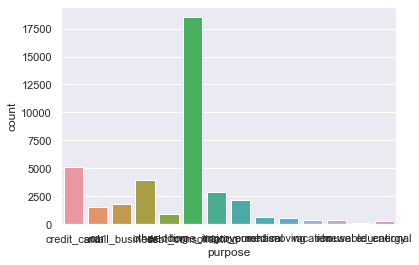

In [70]:
sns.countplot(loan['purpose'])

In [138]:
#del_loan_purpose = (loan.purpose.value_counts()*100)/len(loan)
#del_loan_purpose = del_loan_purpose[(del_loan_purpose < 0.75) | (del_loan_purpose.index == 'other')]

#loan.drop(labels = loan[loan.purpose.isin(del_loan_purpose.index)].index, inplace=True)
#print("So now we are left with",loan.shape ,"rows & columns.")

loan.purpose.value_counts()

debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
house                   381
vacation                381
educational             325
renewable_energy        103
Name: purpose, dtype: int64

In [139]:
#def_purpose_other = (loan['purpose'].value_counts()*100)/len(loan)
#def_purpose_other[(def_purpose_other < 0.75) | (def_purpose_other.index == 'other')]

#loan['purpose_other']= [(def_purpose_other < 0.75) | (def_purpose_other.index == 'other')]
#loan['purpose_other'].value_counts()
#def_purpose_other
#loan.head()
#print("So now we are left with",loan.shape ,"rows & columns.")
#pps
#print(loan.purpose.unique())

bins = [0, 3000, 5000, 15000, 20000]
slot = ['debt_consolidation', 'credit_card', 'others']
loan['purpose'] = pd.cut(loan['purpose'], bins, labels=slot)

TypeError: '<' not supported between instances of 'int' and 'str'

In [30]:
loan.purpose_other.count()

AttributeError: 'DataFrame' object has no attribute 'purpose_other'

#### 8. Loan Status : Drop records where values are less than 1.5%
As we can see, Other than ['Current','Fully Paid' & Charged off] other loan_status are not relevent for our analysis.

In [31]:
(loan.loan_status.value_counts()*100)/len(loan)

Fully Paid    82.9620
Charged Off   14.1677
Current        2.8703
Name: loan_status, dtype: float64

In [32]:
del_loan_status = (loan.loan_status.value_counts()*100)/len(loan)
del_loan_status = del_loan_status[(del_loan_status < 1.5)]

loan.drop(labels = loan[loan.loan_status.isin(del_loan_status.index)].index, inplace=True)
print("So now we are left with",loan.shape ,"rows & columns.")

print(loan.loan_status.unique())

So now we are left with (39717, 40) rows & columns.
['Fully Paid' 'Charged Off' 'Current']


In [33]:
(loan.loan_status.value_counts()*100)/len(loan)

Fully Paid    82.9620
Charged Off   14.1677
Current        2.8703
Name: loan_status, dtype: float64

<a id='derived'></a>

## V. Derived Metrics

** We will now derive some new columns based on our business understanding that will be helpful in our analysis. **

#### 1. Loan amount to Annual Income ratio

In [34]:
loan['loan_income_ratio']= loan['loan_amnt']/loan['annual_inc']

In [35]:
loan['issue_d']

0        Dec-11
1        Dec-11
2        Dec-11
3        Dec-11
4        Dec-11
5        Dec-11
6        Dec-11
7        Dec-11
8        Dec-11
9        Dec-11
10       Dec-11
11       Dec-11
12       Dec-11
13       Dec-11
14       Dec-11
15       Dec-11
16       Dec-11
17       Dec-11
18       Dec-11
19       Dec-11
20       Dec-11
21       Dec-11
22       Dec-11
23       Dec-11
24       Dec-11
25       Dec-11
26       Dec-11
27       Dec-11
28       Dec-11
29       Dec-11
          ...  
39687    Aug-07
39688    Aug-07
39689    Jul-07
39690    Jul-07
39691    Jul-07
39692    Jul-07
39693    Jul-07
39694    Jul-07
39695    Jul-07
39696    Jul-07
39697    Jul-07
39698    Jul-07
39699    Jul-07
39700    Jul-07
39701    Jul-07
39702    Jul-07
39703    Jul-07
39704    Jul-07
39705    Jul-07
39706    Jul-07
39707    Jul-07
39708    Jul-07
39709    Jul-07
39710    Jul-07
39711    Jul-07
39712    Jul-07
39713    Jul-07
39714    Jul-07
39715    Jul-07
39716    Jun-07
Name: issue_d, Length: 3

#### 2. Extract Year & Month from Issue date

In [36]:
loan['issue_month'],loan['issue_year'] = loan['issue_d'].str.split('-', 1).str

loan[['issue_d','issue_month','issue_year']].head()

,issue_d,issue_month,issue_year
0,Dec-11,Dec,11
1,Dec-11,Dec,11
2,Dec-11,Dec,11
3,Dec-11,Dec,11
4,Dec-11,Dec,11


In [52]:
type(loan['issue_d'])

pandas.core.series.Series

#### 3. Change order of months from Jan to Dec, currently it's in alphabetical order(A-Z)

In [37]:
months_order = ["Jan", "Feb", "Mar", "Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
loan['issue_month'] = pd.Categorical(loan['issue_month'],categories=months_order, ordered=True)

#### 4. Create Bins for range of Loan Amount

In [38]:
bins = [0, 5000, 10000, 15000, 20000, 25000,30000]
slot = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000 and above']
loan['loan_amnt_range'] = pd.cut(loan['loan_amnt'], bins, labels=slot)

In [39]:
loan[ ['loan_amnt_range','loan_amnt']].head()

,loan_amnt_range,loan_amnt
0,0-5000,5000
1,0-5000,2500
2,0-5000,2400
3,5000-10000,10000
4,0-5000,3000


#### 5. Create Bins for range of Annual Income

In [40]:
bins = [0, 25000, 50000, 75000, 100000,1000000]
slot = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000 and above']
loan['annual_inc_range'] = pd.cut(loan['annual_inc'], bins,labels=slot)

In [60]:
loan.annual_inc_range

0                 0-25000
1             25000-50000
2                 0-25000
5             25000-50000
6             25000-50000
7             25000-50000
8             25000-50000
10            50000-75000
11            50000-75000
12            25000-50000
13                0-25000
15            25000-50000
16            25000-50000
17       100000 and above
18           75000-100000
19           75000-100000
20            25000-50000
21       100000 and above
22            25000-50000
23            25000-50000
24           75000-100000
25           75000-100000
26            50000-75000
28       100000 and above
29                0-25000
30                0-25000
31            50000-75000
32            25000-50000
33                0-25000
34            25000-50000
               ...       
39685         25000-50000
39686         50000-75000
39687         50000-75000
39688    100000 and above
39689             0-25000
39690         50000-75000
39691         50000-75000
39693       

#### 6. Create Bins for range of Interest rates

In [41]:
bins = [0, 7.5, 10, 12.5, 15,20]
slot = ['0-7.5', '7.5-10', '10-12.5', '12.5-15', '15 and above']
loan['int_rate_range'] = pd.cut(loan['int_rate'], bins, labels=slot)

In [42]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,int_rate_bkp,loan_income_ratio,issue_month,issue_year,loan_amnt_range,annual_inc_range,int_rate_range
0,5000,5000,4975.0000,36 months,10.6500,162.8700,B,B2,10+ years,RENT,24000.0000,Verified,Dec-11,Fully Paid,credit_card,Computer,AZ,27.6500,0,Jan-85,1,3,0,13648,83.70%,9,0.0000,0.0000,5863.1552,5833.8400,5000.0000,863.1600,0.0000,0.0000,0.0000,Jan-15,171.6200,May-16,0.0000,10.6500,0.2083,Dec,11,0-5000,0-25000,10-12.5
1,2500,2500,2500.0000,60 months,15.2700,59.8300,C,C4,< 1 year,RENT,30000.0000,Source Verified,Dec-11,Charged Off,car,bike,GA,1.0000,0,Apr-99,5,3,0,1687,9.40%,4,0.0000,0.0000,1008.7100,1008.7100,456.4600,435.1700,0.0000,117.0800,1.1100,Apr-13,119.6600,Sep-13,0.0000,15.2700,0.0833,Dec,11,0-5000,25000-50000,15 and above
2,2400,2400,2400.0000,36 months,15.9600,84.3300,C,C5,10+ years,RENT,12252.0000,Not Verified,Dec-11,Fully Paid,small_business,real estate business,IL,8.7200,0,Nov-01,2,2,0,2956,98.50%,10,0.0000,0.0000,3005.6668,3005.6700,2400.0000,605.6700,0.0000,0.0000,0.0000,Jun-14,649.9100,May-16,0.0000,15.9600,0.1959,Dec,11,0-5000,0-25000,15 and above
3,10000,10000,10000.0000,36 months,13.4900,339.3100,C,C1,10+ years,RENT,49200.0000,Source Verified,Dec-11,Fully Paid,other,personel,CA,20.0000,0,Feb-96,1,10,0,5598,21%,37,0.0000,0.0000,12231.8900,12231.8900,10000.0000,2214.9200,16.9700,0.0000,0.0000,Jan-15,357.4800,Apr-16,0.0000,13.4900,0.2033,Dec,11,5000-10000,25000-50000,12.5-15
4,3000,3000,3000.0000,60 months,12.6900,67.7900,B,B5,1 year,RENT,80000.0000,Source Verified,Dec-11,Current,other,Personal,OR,17.9400,0,Jan-96,0,15,0,27783,53.90%,38,524.0600,524.0600,3513.3300,3513.3300,2475.9400,1037.3900,0.0000,0.0000,0.0000,May-16,67.7900,May-16,0.0000,12.6900,0.0375,Dec,11,0-5000,75000-100000,12.5-15


In [43]:
loan.to_csv('loan_clean.csv')

<a id='univariate'></a>

## VI. Univariate Analysis

### Continuous Variables
In case of continuous variables, we need to understand the central tendency and spread of the variable.These are measured using various statistical metrics visualization methods such as Boxplot,Histogram/Distribution Plot, Violin Plot etc.

### Categorical Variables
For categorical variables, we’ll use frequency table to understand distribution of each category. It can be be measured using two metrics, Count and Count% against each category. Countplot or Bar chart can be used as visualization.

__<font color='green'>UDF :: univariate(df,col,vartype,hue)</font>__

###### Univariate function will plot the graphs based on the parameter values.

In [44]:
def univariate(df,col,vartype,hue =None):    
    '''
    Univariate function will plot the graphs based on the parameters.
    df      : dataframe name
    col     : Column name
    vartype : variable type : continuos or categorical
                Continuos(0)   : Distribution, Violin & Boxplot will be plotted.
                Categorical(1) : Countplot will be plotted.
    hue     : It's only applicable for categorical analysis.
    
    '''
    sns.set(style="darkgrid")
    
    if vartype == 0:
        fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
        ax[0].set_title("Distribution Plot")
        sns.distplot(df[col],ax=ax[0])
        ax[1].set_title("Violin Plot")
        sns.violinplot(data =df, x=col,ax=ax[1], inner="quartile")
        ax[2].set_title("Box Plot")
        sns.boxplot(data =df, x=col,ax=ax[2],orient='v')
    
    if vartype == 1:
        temp = pd.Series(data = hue)
        fig, ax = plt.subplots()
        width = len(df[col].unique()) + 6 + 4*len(temp.unique())
        fig.set_size_inches(width , 7)
        ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue) 
        if len(temp.unique()) > 0:
            for p in ax.patches:
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan))), (p.get_x()+0.05, p.get_height()+20))  
        else:
            for p in ax.patches:
                ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
        del temp
    else:

        exit
        
    plt.show()

### Continuous Variables

#### 1. Loan Amount

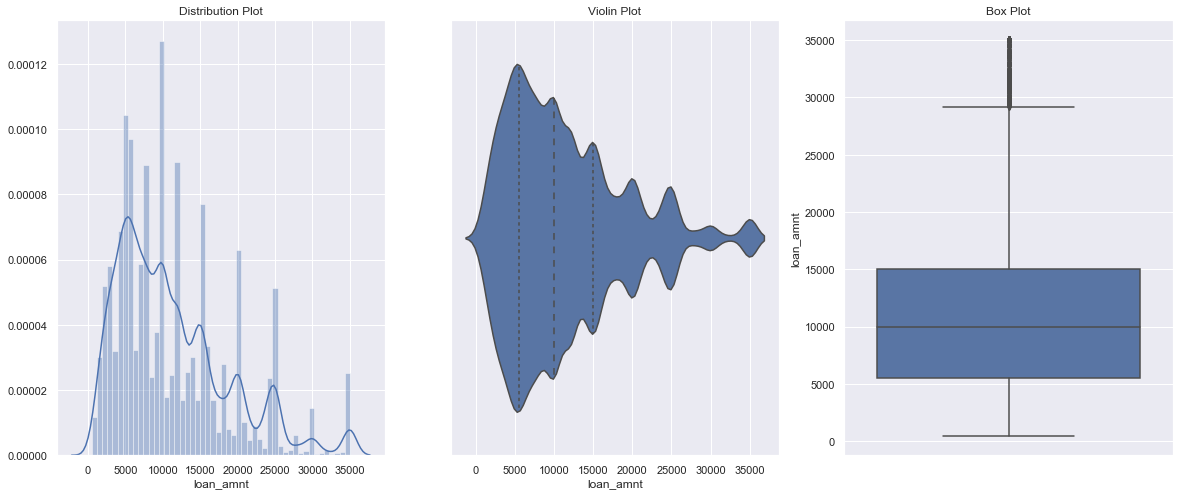

In [46]:
univariate(df=loan,col='loan_amnt',vartype=0)

How to read Violan curve:
https://www.youtube.com/watch?v=M6Nu59Fsyyw

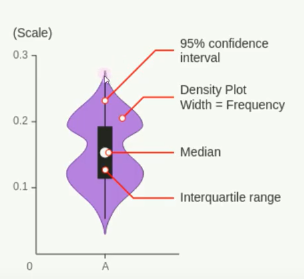

<font color='blue'><b>Insights</b>: Most of the loan amounts are distributed between 8000 to 20000 USD.</font> 

#### 2. Interest Rate

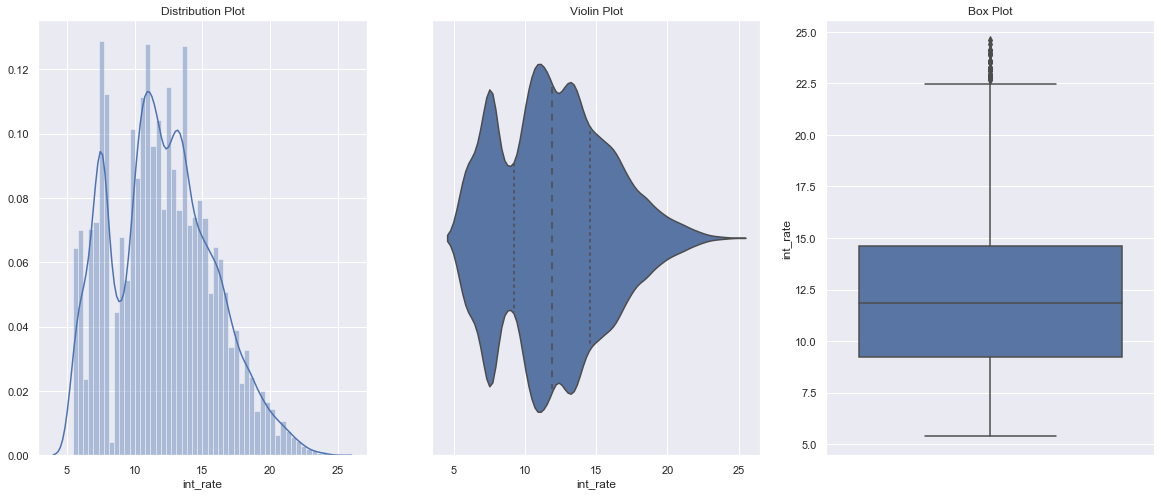

In [47]:
univariate(df=loan,col='int_rate',vartype=0)

<font color='blue'><b>Insights</b>: Most of the loans interest rates are distributed between 10% to 16%.</font> 

#### 3. Annual Income

In [ ]:
loan["annual_inc"].describe()

###### Max value is 9500000 which is approx 150 times more than mean value, so we will remove the outliers from Annual Income.

Remove Outliers (values from 99 to 100%)

In [48]:
q = loan["annual_inc"].quantile(0.995)
loan = loan[loan["annual_inc"] < q]
loan["annual_inc"].describe()

count    39494.0000
mean     66378.2576
std      37413.2123
min       4000.0000
25%      40000.0000
50%      58776.0000
75%      81996.0000
max     294000.0000
Name: annual_inc, dtype: float64

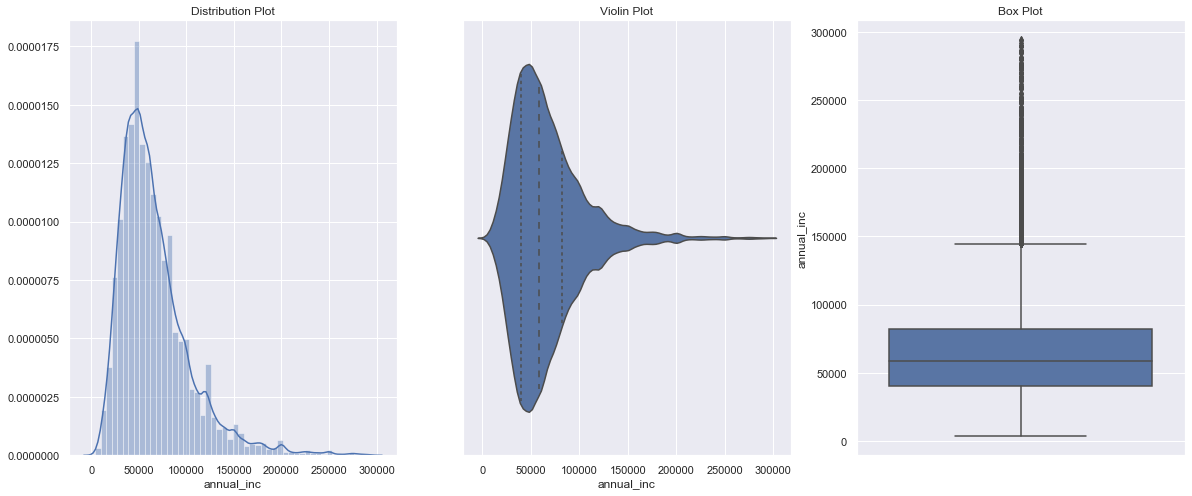

In [49]:
univariate(df=loan,col='annual_inc',vartype=0)

<font color='blue'><b>Insights</b>: Most of the applicants earns beteen 40000 to 90000 USD annually.</font> 

### Categorical Variables

#### 4. Loan Status

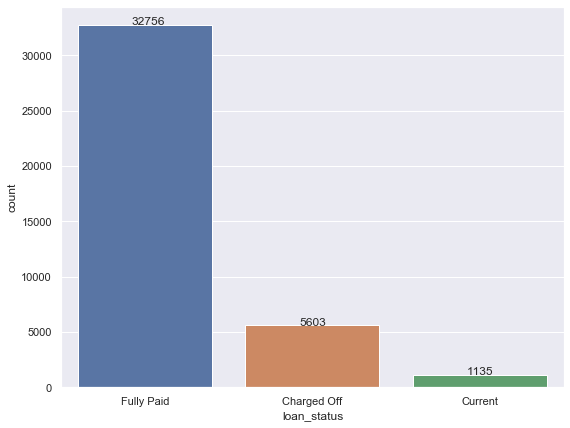

In [50]:
univariate(df=loan,col='loan_status',vartype=1)

<font color='blue'><b>Insights</b>: 5% of the applicants Charged off.</font> 

#### 5. Purpose of loan

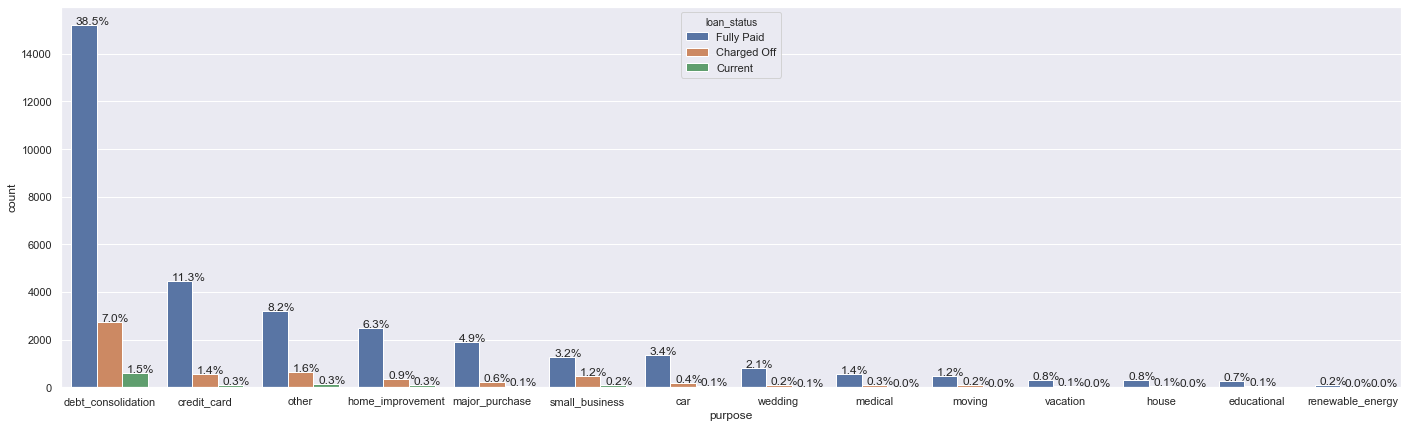

In [51]:
univariate(df=loan,col='purpose',vartype=1,hue='loan_status')

<font color='blue'><b>Insights</b>: Approx 60% of the applicants applied loan for paying their other loans(Debt Consolidation).</font> 

#### 6. Home Ownership wise Loan

In [52]:
loan.purpose.unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [53]:
loan.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [54]:
# Remove rows where home_ownership'=='OTHER', 'NONE', 'ANY'
rem = ['OTHER', 'NONE', 'ANY']
loan.drop(loan[loan['home_ownership'].isin(rem)].index,inplace=True)
loan.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE'], dtype=object)

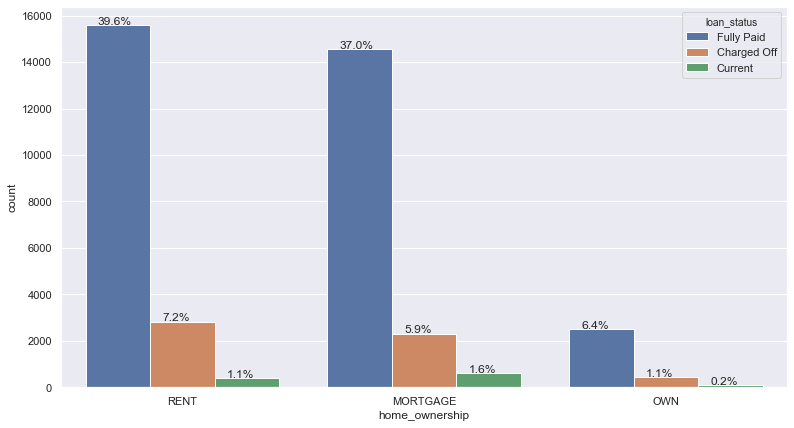

In [55]:
univariate(df=loan,col='home_ownership',vartype=1,hue='loan_status')

<font color='blue'><b>Insights</b>: 40% of applicants are living in rented home whereas 52% applicants were mortagaged their home.</font> 

#### 7. Year wise Loan

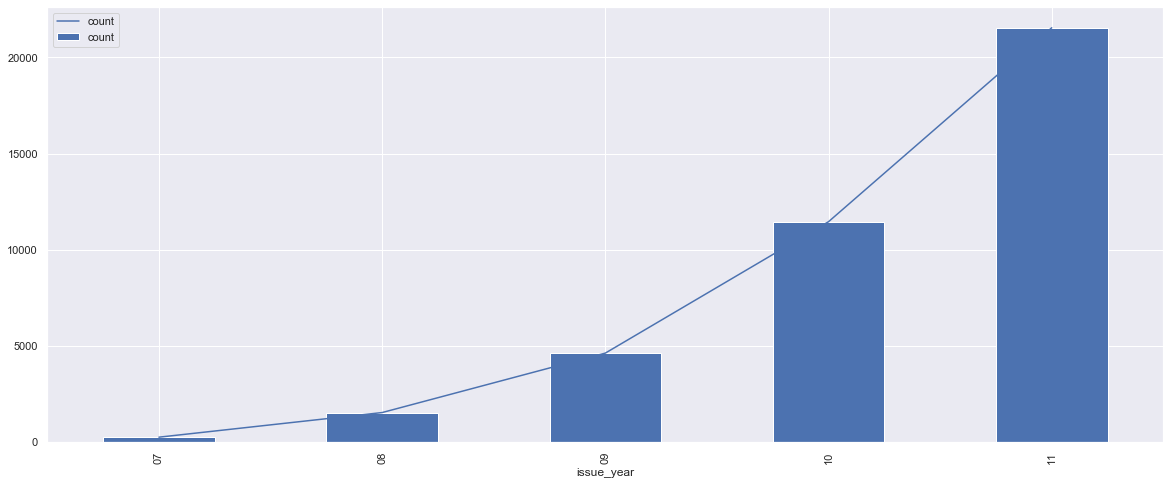

In [56]:
year_wise =loan.groupby(by= [loan.issue_year])[['loan_status']].count()
year_wise.rename(columns={"loan_status": "count"},inplace=True)
ax =year_wise.plot(figsize=(20,8))
year_wise.plot(kind='bar',figsize=(20,8),ax = ax)
plt.show()

<font color='blue'><b>Insights</b>: loan applicants are increasing year on year, approx 47% of loan applicants received loans in 2011.</font> 

#### 8. Loan Term

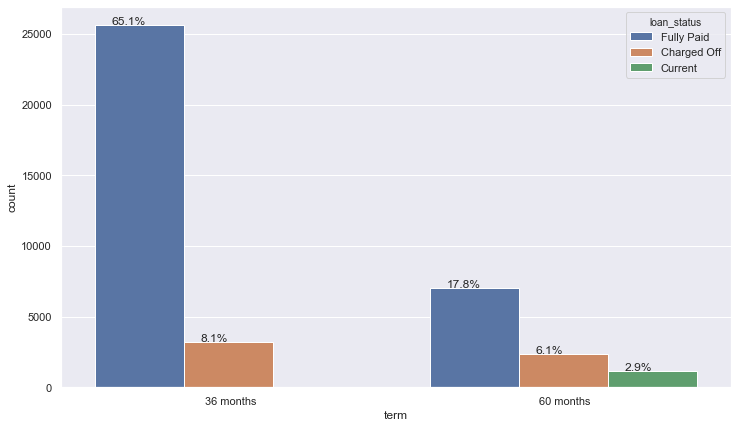

In [57]:
univariate(df=loan,col='term',vartype=1,hue='loan_status')

<font color='blue'><b>Insights</b>: 70% of applicants applied loan for 36 months term period.</font> 

In [ ]:
loan.head(3)

<a id='bivariate'></a>

## VII. Bivariate/Multivariate Analysis
Bivariate/Multivariate Analysis finds out the relationship between two/two or more variables.We can perform Bivariate/Multivariate analysis for any combination of categorical and continuous variables. The combination can be: Categorical & Categorical, Categorical & Continuous and Continuous & Continuous.

#### 1. Purpose of Loan vs Loan Amount for each Loan Status

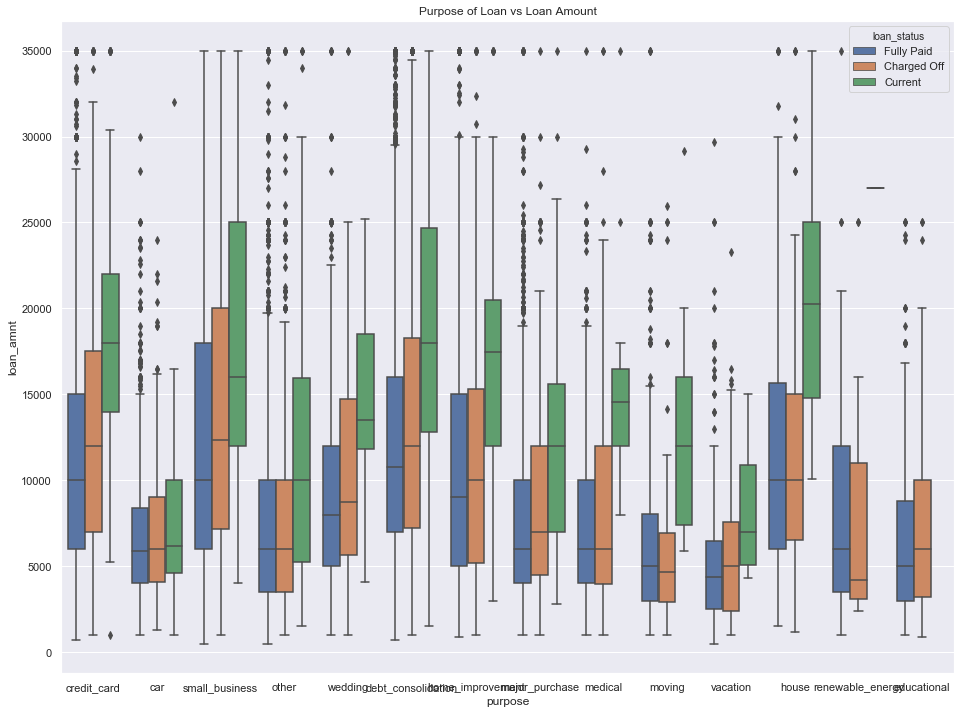

In [58]:
plt.figure(figsize=(16,12))
sns.boxplot(data =loan, x='purpose', y='loan_amnt', hue ='loan_status')
plt.title('Purpose of Loan vs Loan Amount')
plt.show()

#### 2. Correlation Matrix : All Continuos(Numeric) Variables

In [59]:
loan_correlation = loan.corr()
loan_correlation

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,int_rate_bkp,loan_income_ratio
loan_amnt,1.0000,0.9817,0.9405,0.3077,0.9301,0.4179,0.0717,-0.0342,0.0069,0.1753,-0.0505,0.3148,0.2529,0.1948,0.1945,0.8861,0.8540,0.8510,0.7299,0.0446,0.1366,0.0733,0.4482,-0.0365,0.3077,0.6188
funded_amnt,0.9817,1.0000,0.9587,0.3114,0.9559,0.4136,0.0713,-0.0340,0.0073,0.1733,-0.0513,0.3072,0.2468,0.1968,0.1965,0.9026,0.8704,0.8691,0.7377,0.0466,0.1374,0.0751,0.4526,-0.0377,0.3114,0.6071
funded_amnt_inv,0.9405,0.9587,1.0000,0.3056,0.9052,0.3963,0.0791,-0.0397,-0.0070,0.1609,-0.0524,0.2884,0.2392,0.2054,0.2054,0.8807,0.9126,0.8449,0.7307,0.0270,0.1248,0.0606,0.4428,-0.0421,0.3056,0.5784
int_rate,0.3077,0.3114,0.3056,1.0000,0.2815,0.0769,0.1135,0.1568,0.1332,0.0078,0.0981,0.0936,-0.0472,0.1350,0.1350,0.3065,0.3021,0.1847,0.5293,0.0934,0.1236,0.0680,0.1556,0.0831,1.0000,0.2163
installment,0.9301,0.9559,0.9052,0.2815,1.0000,0.4172,0.0596,-0.0219,0.0075,0.1706,-0.0455,0.3087,0.2265,0.1267,0.1266,0.8563,0.8170,0.8497,0.6347,0.0562,0.1191,0.0758,0.4010,-0.0331,0.2815,0.5578
annual_inc,0.4179,0.4136,0.3963,0.0769,0.4172,1.0000,-0.1181,0.0300,0.0364,0.2548,-0.0228,0.4253,0.3689,0.0619,0.0617,0.3977,0.3828,0.3996,0.2859,0.0126,0.0375,0.0234,0.2177,-0.0215,0.0769,-0.3098
dti,0.0717,0.0713,0.0791,0.1135,0.0596,-0.1181,1.0000,-0.0335,0.0037,0.2907,-0.0051,0.2387,0.2342,0.0363,0.0362,0.0700,0.0765,0.0463,0.1106,-0.0114,0.0254,0.0120,0.0081,0.0053,0.1135,0.1427
delinq_2yrs,-0.0342,-0.0340,-0.0397,0.1568,-0.0219,0.0300,-0.0335,1.0000,0.0075,0.0118,0.0083,-0.0573,0.0669,-0.0030,-0.0032,-0.0245,-0.0306,-0.0407,0.0219,0.0319,0.0121,0.0132,-0.0141,0.0041,0.1568,-0.0630
inq_last_6mths,0.0069,0.0073,-0.0070,0.1332,0.0075,0.0364,0.0037,0.0075,1.0000,0.0910,0.0257,-0.0242,0.1100,-0.0117,-0.0114,-0.0127,-0.0220,-0.0259,0.0211,0.0304,0.0194,0.0126,0.0271,0.0169,0.1332,-0.0264
open_acc,0.1753,0.1733,0.1609,0.0078,0.1706,0.2548,0.2907,0.0118,0.0910,1.0000,0.0010,0.2888,0.6864,0.0289,0.0287,0.1605,0.1509,0.1588,0.1221,-0.0196,0.0159,0.0057,0.0783,0.0068,0.0078,-0.0404


#### 3. HeatMap: All continuos variables

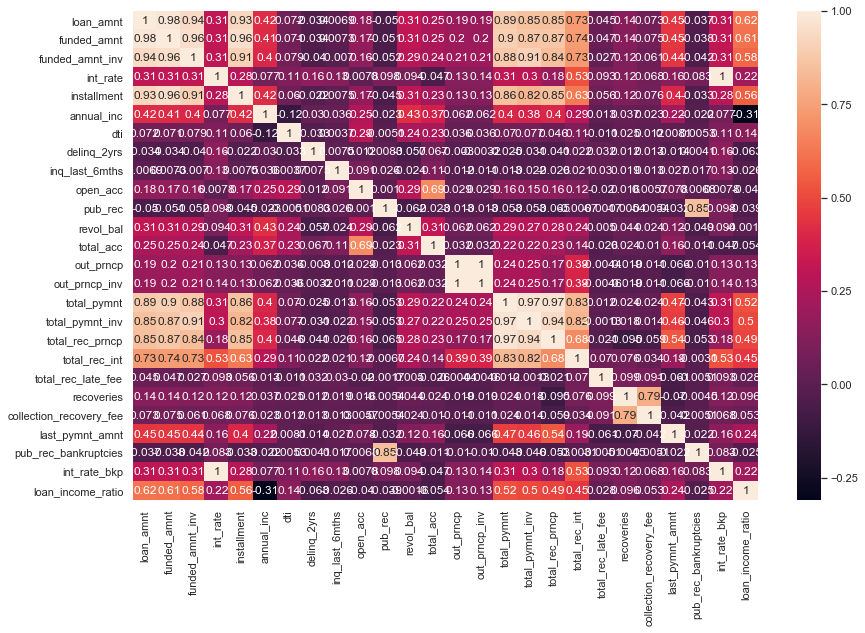

In [60]:
f, ax = plt.subplots(figsize=(14, 9))
sns.heatmap(loan_correlation, 
            xticklabels=loan_correlation.columns.values,
            yticklabels=loan_correlation.columns.values,annot= True)
plt.show()

<font color='blue'><b>Insights</b>: It is clear from the Heatmap that how <b>'loan_amnt','funded_amnt' & 'funded_amnt_inv'</b> are closely <b>interrelated</b>.So we can take any one column out of them for our analysis.</font> 

#### 4. Employment Length vs Loan Amount for different pupose of Loan

In [61]:
loanstatus=loan.pivot_table(index=['loan_status','purpose','emp_length'],values='loan_amnt',aggfunc=('count')).reset_index()
loanstatus=loan.loc[loan['loan_status']=='Charged Off']

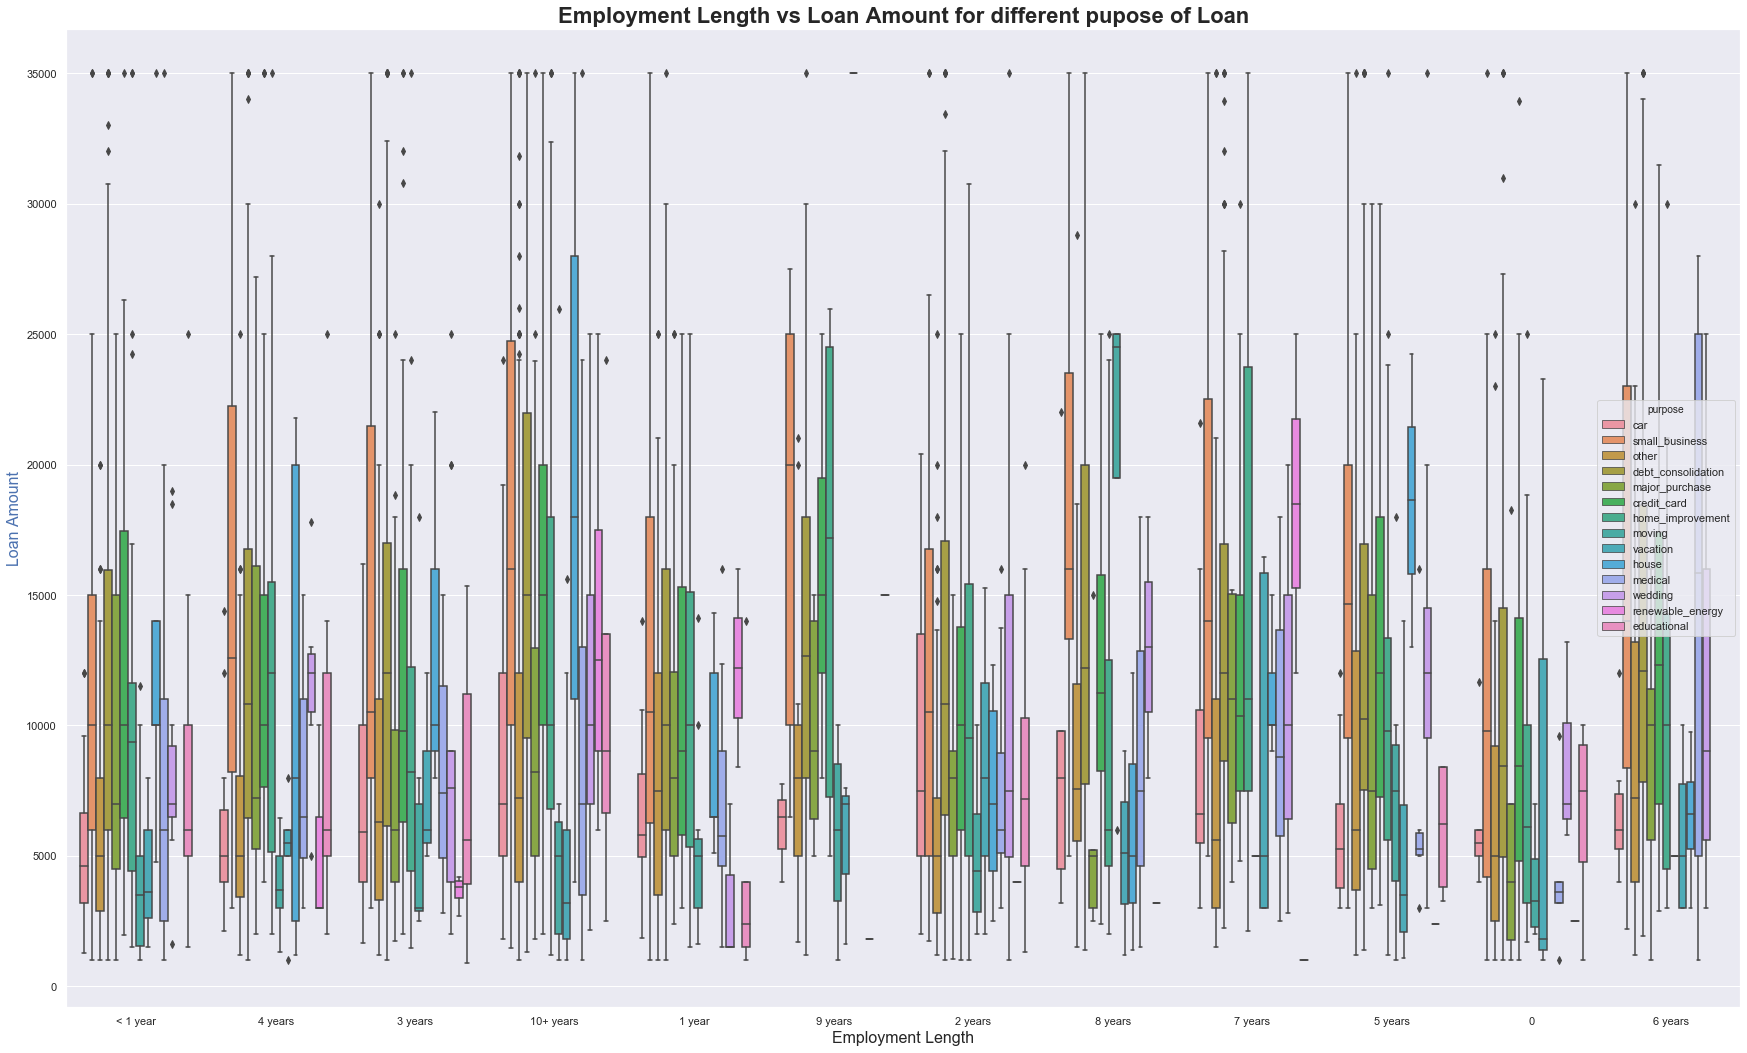

In [62]:
ax = plt.figure(figsize=(30, 18))
ax = sns.boxplot(x='emp_length',y='loan_amnt',hue='purpose',data=loanstatus)
ax.set_title('Employment Length vs Loan Amount for different pupose of Loan',fontsize=22,weight="bold")
ax.set_xlabel('Employment Length',fontsize=16)
ax.set_ylabel('Loan Amount',color = 'b',fontsize=16)
plt.show()

<a id='bivariate_prob'></a>

## VIII. Bivariate/Multivariate Analysis with Probability of Charge off

### Categorical Variables vs Probability of Charged Off

The main motive of this use case to find what parameters are impacting the most on Loan Status that is if a applicant will successfully complete the loan term or will charge off.

So we will be using a new term now <b>Probability of Charged Off</b> that will be equal to :

\begin{equation*}
{Probability\:of\:Charged\:Off =\:}\frac{Number\:of\:Applicants\:who\:charged\:off}{Total\:No.\:of\:Applicants}
\end{equation*}


We will calculate this probability w.r.t each column in bivariate analysis & will see how the Probability of Charged Off changes with these columns.

We will create a user defined function for this.

__<font color='green'><u><b>UDF: </b>crosstab</u></font>__
##### 'crosstab' function will be used to get the summarized table for each column(passed as a variable) along with probability of charge off w.r.t that column.

In [63]:
def crosstab(df,col):
    '''
    df : Dataframe
    col: Column Name
    '''
    crosstab = pd.crosstab(df[col], df['loan_status'],margins=True)
    crosstab['Probability_Charged Off'] = round((crosstab['Charged Off']/crosstab['All']),3)
    crosstab = crosstab[0:-1]
    return crosstab

__<font color='green'><u><b>UDF: </b>bivariate_prob</u></font>__
##### 'bivariate_prob' function will be used to plot count of values for each column(passed as a variable) stacked across 'loan_status' along with probability of charged off as a line chart.

In [ ]:
# Probability of charge off
def bivariate_prob(df,col,stacked= True):
    '''
    df      : Dataframe
    col     : Column Name
    stacked : True(default) for Stacked Bar
    '''
    # get dataframe from crosstab function
    plotCrosstab = crosstab(df,col)
    
    linePlot = plotCrosstab[['Probability_Charged Off']]      
    barPlot =  plotCrosstab.iloc[:,0:2]
    ax = linePlot.plot(figsize=(20,8), marker='o',color = 'b')
    ax2 = barPlot.plot(kind='bar',ax = ax,rot=1,secondary_y=True,stacked=stacked)
    ax.set_title(df[col].name.title()+' vs Probability Charge Off',fontsize=20,weight="bold")
    ax.set_xlabel(df[col].name.title(),fontsize=14)
    ax.set_ylabel('Probability of Charged off',color = 'b',fontsize=14)
    ax2.set_ylabel('Number of Applicants',color = 'g',fontsize=14)
    plt.show()

#### 1. Location vs Probability Charge Off

In [66]:
filter_states = loan.addr_state.value_counts()
filter_states = filter_states[(filter_states < 10)]

loan_filter_states = loan.drop(labels = loan[loan.addr_state.isin(filter_states.index)].index)

In [67]:
states = crosstab(loan_filter_states,'addr_state')
display(states.tail(20))

bivariate_prob(df =loan_filter_states,col ='addr_state')

loan_status,Charged Off,Current,Fully Paid,All,Probability_Charged Off
addr_state,,,,,
NJ,277,59,1495,1831,0.1510
NM,30,5,151,186,0.1610
NV,107,17,368,492,0.2170
NY,491,113,3175,3779,0.1300
OH,153,45,1020,1218,0.1260
OK,40,12,247,299,0.1340
OR,71,16,363,450,0.1580
PA,178,49,1285,1512,0.1180
RI,25,4,166,195,0.1280


NameError: name 'bivariate_prob' is not defined

<font color='blue'><b>Insights</b>: There are multiple States/Provinces with high probability of charge,highest being 'NV' at 7%</font>   

#### 2. Purpose of Loan vs Probability Charge Off

In [64]:
purpose = crosstab(loan,'purpose')
display(purpose)

bivariate_prob(df =loan,col ='purpose',stacked=False)

loan_status,Charged Off,Current,Fully Paid,All,Probability_Charged Off
purpose,,,,,
car,159,50,1336,1545,0.1030
credit_card,539,103,4457,5099,0.1060
debt_consolidation,2753,585,15181,18519,0.1490
educational,56,0,265,321,0.1740
home_improvement,340,99,2479,2918,0.1170
house,59,14,301,374,0.1580
major_purchase,220,37,1912,2169,0.1010
medical,106,12,568,686,0.1550
moving,90,7,480,577,0.1560


NameError: name 'bivariate_prob' is not defined

<font color='blue'><b>Insights</b>: Applicants who has taken the Loan for 'small business' has the highest probabilty of charge off of 14%. So bank should take extra caution like take some asset or guarentee while approving the loan for purpose of 'small business'</font>   

#### 3. Grade/Subgrade vs Probability Charge Off

In [ ]:
grade = crosstab(loan,'grade')
display(grade)

bivariate_prob(df =loan,col ='grade',stacked=False)
bivariate_prob(df =loan,col ='sub_grade')

<font color='blue'><b>Insights</b>: As we move from Grade A to G, probability that person will charged off is increasing.</font>      

#### 4. Annual Income Range vs Probability Charge Off

In [ ]:
annual_inc_range = crosstab(loan,'annual_inc_range')
display(annual_inc_range)

bivariate_prob(df =loan,col ='annual_inc_range')

<font color='blue'><b>Insights</b>: As the annual income is decreasing the probability that person will default is increasing with highest of 7% at (0 to 25000) salary bracket.</font>      

#### 5. Interest rate Range vs Probability Charge Off

In [ ]:
int_rate_range = crosstab(loan,'int_rate_range')
display(int_rate_range)

bivariate_prob(df =loan,col ='int_rate_range')

<font color='blue'><b>Insights</b>: As the interest rate is increasing the probability that person will default is increasing with highest of 9% at 15% & above bracket.</font>      

#### 6. Employment Length vs Probability Charge Off

In [ ]:
emp_length = crosstab(loan,'emp_length')
display(emp_length)

bivariate_prob(df =loan,col ='emp_length')

<font color='blue'><b>Insights</b>: Applicants who are self employed & less than 1 year of experience are more probable of charged off.. </font> 

<a id='Conclusion'></a>

***
## <font color='blue'><b>IX. Conclusion</b></font> 

### Target Variable
* <font color='blue'><b>Loan Status</b></font>

### Top-5 Major variables to consider for loan prediction: 
1. <font color='blue'><b>Purpose of Loan</b></font>
2. <font color='blue'><b>Employment Length</b></font>
3. <font color='blue'><b>Grade</b></font>
4. <font color='blue'><b>Interest Rate</b></font>
5. <font color='blue'><b>Term</b></font>